In [1]:
import pandas as pd
import fractions

# DM 2022
# Assignment 2 - Discovering keys

## General information

**Deadline:** 04.04 at 12h

**Deliverables:**
- *Code*: A Jupyter Notebook
- *Report:* A short report (max. 2 pages) as a Word document or other text file

**Submission:**
- Store your data, code and report in your group’s private GitHub repository (shared with the team members and the TAs). Make sure your notebook is pushed with all output visible, i.e., in a form whereby we do not need to run the code.

*Please make sure to give an **unambiguous** name to the final notebook and essay for each assignment, so that we know what files to grade*


# The dataset

The dataset for this assignment is based on a corpus comprising the Piano Sonatas by W. A. Mozart (1756-1791) and the String Quartets by L. van Beethoven (1770-1827), as in Assignment 1, as well as some movements from the Trio Sonatas by A. Corelli (1653-1713). 

The scores are available in the repository, and have already been parsed into a dataframe that you also find in the repository under the name `DM2022 - Assignment 2 [Dataset].csv`. 

The main difference between this new dataset and the one you worked with in Assignment 1 (besides the additional pieces) is the way the location in time of the individual note-events is encoded. In Assignment 1, each note was located in terms of its distance from the beginning of the piece (the `global_onset` feature). In this Assignment 2, there is no `global_onset` feature, and the position of each note is rather encoded by specifying the bar number (`mn`) and the position inside the bar (`mn_onset`) where the note's onset occurs.

In [2]:
keys_dataset = pd.read_csv('DM2022 - Assignment 2 [Dataset].csv', converters = {'duration': fractions.Fraction, 'nominal_duration': fractions.Fraction, 'scalar': fractions.Fraction}, index_col = 0, low_memory = False)
keys_dataset

,n,piece,mn,mn_onset,timesig,act_dur,staff,voice,duration,gracenote,...,scalar,tied,tpc,midi,globalkey,globalkey_tpc,globalkey_is_minor,localkey,localkey_relativetpc,localkey_is_minor
0,0,MozartSonatas/K280-1,1,0,3/4,3/4,2,1,1/4,NaN,...,1,NaN,-1,41,F,-1.0,False,I,0.0,False
1,1,MozartSonatas/K280-1,1,0,3/4,3/4,2,1,1/4,NaN,...,1,NaN,-1,53,F,-1.0,False,I,0.0,False
2,2,MozartSonatas/K280-1,1,0,3/4,3/4,1,1,1/4,NaN,...,1,NaN,0,60,F,-1.0,False,I,0.0,False
3,3,MozartSonatas/K280-1,1,0,3/4,3/4,1,1,1/4,NaN,...,1,NaN,-1,65,F,-1.0,False,I,0.0,False
4,4,MozartSonatas/K280-1,1,0,3/4,3/4,1,1,1/4,NaN,...,1,NaN,3,69,F,-1.0,False,I,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404338,643,CorelliTrioSonatas/op04n04d,31,3/4,12/8,11/8,2,1,3/8,NaN,...,3/2,1.0,2,62,D,2.0,False,I,0.0,False
404339,644,CorelliTrioSonatas/op04n04d,31,3/4,12/8,11/8,1,1,3/8,NaN,...,3/2,1.0,6,66,D,2.0,False,I,0.0,False
404340,645,CorelliTrioSonatas/op04n04d,31,9/8,12/8,11/8,3,1,1/4,NaN,...,1,-1.0,2,38,D,2.0,False,I,0.0,False
404341,646,CorelliTrioSonatas/op04n04d,31,9/8,12/8,11/8,2,1,1/4,NaN,...,1,-1.0,2,62,D,2.0,False,I,0.0,False


In [3]:
keys_dataset.columns

Index(['n', 'piece', 'mn', 'mn_onset', 'timesig', 'act_dur', 'staff', 'voice',
       'duration', 'gracenote', 'nominal_duration', 'scalar', 'tied', 'tpc',
       'midi', 'globalkey', 'globalkey_tpc', 'globalkey_is_minor', 'localkey',
       'localkey_relativetpc', 'localkey_is_minor'],
      dtype='object')

Each row in the `keys_dataset` dataframe corresponds to one note event:
- **`n`** - unique note identifier within each piece
- **`piece`** - identifier of the piece: `SubCorpus/PieceName`
- **`mn`** - bar (or measure) number
- **`mn_onset`** - onset of the note relative to the beginning of the bar
- **`timesig`** - time signature of the current bar
- **`act_dur`** - actual duration of the current bar (`act_dur` is typically the same as the time signature, but it could be different from the time signature because the bar may be occasionally interrupted or extended)
- **`staff`** - staff to which the note belongs. In the piano sonatas, there are two staves (left and right hand); in the string quartets, there are four (violin I, violin II, viola and cello), etc.
- **`voice`** - voice (within a staff) to which the note belongs
- **`duration`** - duration of the note, expressed as a fraction of a whole note
- **`gracenote`** - encodes whether the note is a grace note
- **`nominal_duration`** - nominal durational value of the note type as notated in the score: for example, a dotted quarter note would have `duration`=3/8 yet `nominal_duration`=1/4, and each note in an eigth-note triplet would have `duration`=1/12 yet `nominal_duration`=1/8
- **`scalar`** - scaling factor between `nominal_duration` and `duration`: in other words,  `duration` = `nominal_duration`*`scalar`
- **`tied`** - if not `nan`, encodes whether the note is tied to the left (-1), to the right (1) or both (0)  
- **`tpc`** - encodes the pitch-class of the note: 0 is C, moving by one integer corresponds to moving by a fifth (e.g., +1 = G, -1 = F). Enharmonic pitch classes have different tpc values (e.g., $+7 = C\sharp \neq D\flat = -5$)
- **`midi`** - encodes the pitch of the note in midi format: 60 = C4, and moving by one integer corresponds to moving by one semitone (note that the midi format does not distinguish between enharmonically equivalent pitches, so that, e.g., 61 corresponds to both C#4 and Db4)

Ground-truth:
- **`globalkey`** - encodes the global key of the piece by indicating the tonic (as a note name) and the mode (upper-case for major, lower-case for minor; e.g., `Eb` is the major key with tonic Eb, whereas `eb` is the minor key with tonic Eb)
- **`globalkey_tpc`** - the tonic of the global key expressed as a tpc
- **`globalkey_is_minor`** - boolean value encoding whether the global key is minor. This information is redundant with the (upper or lower) case of `globalkey`
- **`localkey`** - encodes the local key at the current position in time. The tonic of the local key is indicated as a scale degree (in roman numerals) relative to the global key, and the major/minor mode is indicated by upper/lower case, respectively. So, if `globalkey = Bb`, then `localkey = I` indicates that the local key is Bb major, whereas  `localkey = i` indicates that the local key is Bb minor, and `localkey = V` indicates that the local key is F major, etc.
- **`localkey_relativetpc`** - the tonic of the local key expressed as the distance in tpc relative to the tonic of the global key: in other words, the tonic of the local key is `globalkey_tpc + localkey_relativetpc`
- **`localkey_is_minor`** - same as above, for the local key

Note that some pieces have no ground-truth (`nan`).

# The task

The task for this assignment is to implement a data-driven approach to infer the key of musical passages from a dataset of symbolically-encoded music. 

### A

Each piece in the corpus is assigned a unique *global key* that characterizes the piece as a whole:

In [4]:
keys_dataset.groupby('piece').globalkey.unique().head(10)

piece
BeethovenQuartets/n01op18-1_01     [F]
BeethovenQuartets/n01op18-1_02     [d]
BeethovenQuartets/n01op18-1_03     [F]
BeethovenQuartets/n01op18-1_04     [F]
BeethovenQuartets/n02op18-2_01     [G]
BeethovenQuartets/n02op18-2_02     [C]
BeethovenQuartets/n02op18-2_03     [G]
BeethovenQuartets/n02op18-2_04     [G]
BeethovenQuartets/n03op18-3_01     [D]
BeethovenQuartets/n03op18-3_02    [Bb]
Name: globalkey, dtype: object

The first part of the task is then to:

**(A) Infer the global key for each piece in the corpus**

## B

While the global key characterizes a piece as a whole, each piece can also move (or *modulate*) through different keys, so that there may be regions in a piece that are locally better characterized by a different key than the global key. 

In [5]:
keys_dataset.groupby('piece').localkey.unique().head(10)

piece
BeethovenQuartets/n01op18-1_01          [I, v, V, III, IV, vi, ii, i, iv, bVI, bII]
BeethovenQuartets/n01op18-1_02                                 [i, III, iv, vii, I]
BeethovenQuartets/n01op18-1_03                                 [I, V, bIII, bVI, i]
BeethovenQuartets/n01op18-1_04        [I, V, II, v, vi, ii, i, bVI, bIII, VI, bVII]
BeethovenQuartets/n02op18-2_01     [I, V, iii, v, bIII, iv, bVI, biii, bvii, i, vi]
BeethovenQuartets/n02op18-2_02                                           [I, V, IV]
BeethovenQuartets/n02op18-2_03                                           [I, IV, V]
BeethovenQuartets/n02op18-2_04    [I, V, v, bVII, bVI, bvii, iv, IV, bII, vi, i,...
BeethovenQuartets/n03op18-3_01    [I, v, V, bVII, IV, i, bVI, iv, vi, iii, bIII,...
BeethovenQuartets/n03op18-3_02                               [I, V, v, iv, bIII, i]
Name: localkey, dtype: object

The second part of the task is then to:

**(B) Identify the modulations (changes in the local key within each piece), so that you can predict the local key at all time positions (i.e., for each row in the dataset)**

Quantify the accuracy for local keys and test whether it improves over approximating all local keys with the global key. As an example, show a piece where the approach works particularly well, and one where it works particularly poorly.

# C

The ground-truth for 80% of the pieces is included in the dataset and can be useful for implementing a supervised classification approach, as well as to evaluate the outcomes. 

In [6]:
keys_dataset.loc[:,'globalkey':].head(10)

,globalkey,globalkey_tpc,globalkey_is_minor,localkey,localkey_relativetpc,localkey_is_minor
0,F,-1.0,False,I,0.0,False
1,F,-1.0,False,I,0.0,False
2,F,-1.0,False,I,0.0,False
3,F,-1.0,False,I,0.0,False
4,F,-1.0,False,I,0.0,False
5,F,-1.0,False,I,0.0,False
6,F,-1.0,False,I,0.0,False
7,F,-1.0,False,I,0.0,False
8,F,-1.0,False,I,0.0,False
9,F,-1.0,False,I,0.0,False


The remaining 20% of the pieces (randomly selected among the Trio-Sonata movements by Corelli) has no ground-truth and constitutes a test set:

In [7]:
keys_dataset[keys_dataset.globalkey.isna()].head(10)

,n,piece,mn,mn_onset,timesig,act_dur,staff,voice,duration,gracenote,...,scalar,tied,tpc,midi,globalkey,globalkey_tpc,globalkey_is_minor,localkey,localkey_relativetpc,localkey_is_minor
346267,0,CorelliTrioSonatas/op01n02c_reviewed,1,1/4,3/4,3/4,3,1,1/4,NaN,...,1,NaN,4,52,NaN,NaN,NaN,NaN,NaN,NaN
346268,1,CorelliTrioSonatas/op01n02c_reviewed,1,1/4,3/4,3/4,3,1,1/4,NaN,...,1,NaN,4,52,NaN,NaN,NaN,NaN,NaN,NaN
346269,2,CorelliTrioSonatas/op01n02c_reviewed,1,1/4,3/4,3/4,4,1,1/4,NaN,...,1,NaN,4,52,NaN,NaN,NaN,NaN,NaN,NaN
346270,3,CorelliTrioSonatas/op01n02c_reviewed,1,1/4,3/4,3/4,4,1,1/4,NaN,...,1,NaN,4,52,NaN,NaN,NaN,NaN,NaN,NaN
346271,4,CorelliTrioSonatas/op01n02c_reviewed,1,1/4,3/4,3/4,2,1,1/4,NaN,...,1,NaN,4,76,NaN,NaN,NaN,NaN,NaN,NaN
346272,5,CorelliTrioSonatas/op01n02c_reviewed,1,1/4,3/4,3/4,2,1,1/4,NaN,...,1,NaN,4,76,NaN,NaN,NaN,NaN,NaN,NaN
346273,6,CorelliTrioSonatas/op01n02c_reviewed,1,1/4,3/4,3/4,1,1,1/4,NaN,...,1,NaN,1,79,NaN,NaN,NaN,NaN,NaN,NaN
346274,7,CorelliTrioSonatas/op01n02c_reviewed,1,1/4,3/4,3/4,1,1,1/4,NaN,...,1,NaN,1,79,NaN,NaN,NaN,NaN,NaN,NaN
346275,8,CorelliTrioSonatas/op01n02c_reviewed,1,1/2,3/4,3/4,3,1,1/4,NaN,...,1,NaN,5,47,NaN,NaN,NaN,NaN,NaN,NaN
346276,9,CorelliTrioSonatas/op01n02c_reviewed,1,1/2,3/4,3/4,4,1,1/4,NaN,...,1,NaN,5,47,NaN,NaN,NaN,NaN,NaN,NaN


Once you have a computational approach to infer (A) the global key for each piece and (B) local keys inside a piece, use it to populate the `nan` entries in the `globalkey_tpc`, `globalkey_is_minor`, `localkey_relativetpc`, `localkey_is_minor` columns for the test-set pieces (no need to also replace the `nan`s in the `globalkey` and `localkey` columns):

**(C) Predict global key and local keys for the remaining 20% of the pieces, and specify in the report what accuracy you expect to achieve.**

Once you have replaced the `nan`s with your predictions, export the dataframe to a `PredictedKeys.csv` file. 

In the report, try to motivate the approach you adopted, discuss why it resulted in the observed outcome, and whether/how it could be improved/generalized.

# Example: Inferring  key and modulations from data

As an example, let us consider one piece, the first movement from Mozart Piano Sonata K282:

In [8]:
one_piece = keys_dataset[keys_dataset.piece == 'MozartSonatas/K282-1']

The total duration of each pitch-class in the piece is computed as follows:

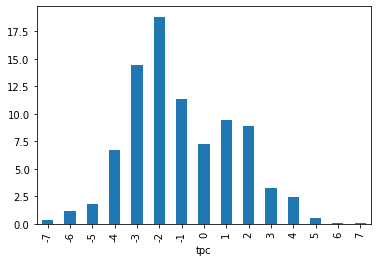

In [9]:
one_piece.groupby('tpc').duration.sum().apply(float).plot(kind = 'bar');

- Can you guess the key of this piece just by looking at this distribution? First, let's have a look at the tonic

In [10]:
print(f'The tonic of this piece is {one_piece.globalkey.unique()[0]}, which corresponds to tpc {one_piece.globalkey_tpc.unique()[0]}')

The tonic of this piece is Eb, which corresponds to tpc -3.0


Any idea why is the tonic *not* the most frequent tone?

- Is the key major or minor?

Note that the distribution highlights a contiguous segment of 7 tpcs, from -4 to 2: the distribution has overall higher values over this interval of its support. 

Recall that any diatonic scale comprises a contiguous segment of the line of fifths, so the seven tpcs from -4 to 2 (Ab, Eb, Bb, F, C, G, D) contain all the notes of a diatonic scale (ordered by fifths, rather than by pitch height). 

This narrows down the posibilities, but is not enough to determine the key: we have two keys that share the same set of diatonic notes: one is a major diatonic scale, one is its relative minor diatonic scale. The two candidate keys whose scales comprise the same diatonic set have different tonics: for the 'major' candidate, the tonic is the second pitch-class in the line-of-fifths ordering, for the 'minor' candidate the tonic is the fifth pitch-class in the line-of-fifths ordering. 

In our case, the diatonic set spans from -4 to 2 in the line of fifths, and the tonic is -3 (Eb), so, it is the second pitch-class in the line-of-fifths ordering. As a consequence, we would conclude that the piece is in a major key, with tonic Eb. 

In [11]:
print(f'The piece is in the key {one_piece.globalkey.unique()[0]} {"minor" if one_piece.globalkey_is_minor.unique()[0] else "major"}')

The piece is in the key Eb major


As mentioned above, the global key reflects the key of the piece as a whole: for example, we know now that Eb is the tonic of the whole piece, its central and (in some sense) most important note. However, does Eb remain the tonic for the entire duration of the piece? As a **very crude** example, let's test this by computing the frequency of occurrence of the global tonic over 4-bar windows throughout the piece:

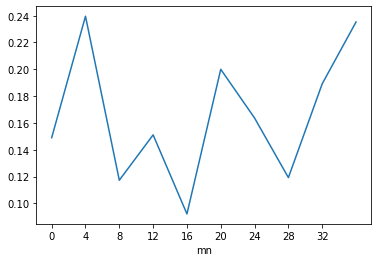

In [12]:
WINDOW = 4 #bars (size of the window)

# Group data by window size,  
#look at the tpc content of each window 
#and compute how frequently the tonic of the global key (in this case Eb, tpc = -3) occurs in each window
ax = one_piece.groupby(one_piece.mn.apply(lambda x: int(x/WINDOW))) \
            .tpc \
            .apply(lambda x: list(x).count(-3)/len(list(x))) \
            .plot(); 

ax.set_xticks(ticks = [i for i in range(int(one_piece.mn.max()/WINDOW))]);
ax.set_xticklabels([i*WINDOW for i in range(int(one_piece.mn.max()/WINDOW))]);

While Eb is certainly very prominent especially towards the beginning and the end, there is at least a region in the middle of the piece (~bars 8-16) where Eb seems less important. Maybe, a modulation is happening there: let's check with the ground-truth

In [13]:
for k, region in one_piece.groupby((one_piece['localkey'].shift() != one_piece['localkey']).cumsum()): #Group regions with the same local key
    print(f'Section {k}: Local key {region.localkey.unique()[0]} from bar {region.mn.min()} to bar {region.mn.max()}')

Section 1: Local key I from bar 1 to bar 6
Section 2: Local key V from bar 7 to bar 15
Section 3: Local key I from bar 15 to bar 36
